## **Importing libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR

## **Data preparing**

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = train_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
print(df.shape)

(1460, 81)


## **Visusalization and analysis**

In [7]:
df['SalePrice'].describe() # 목적 변수의 통계량 확인하기

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

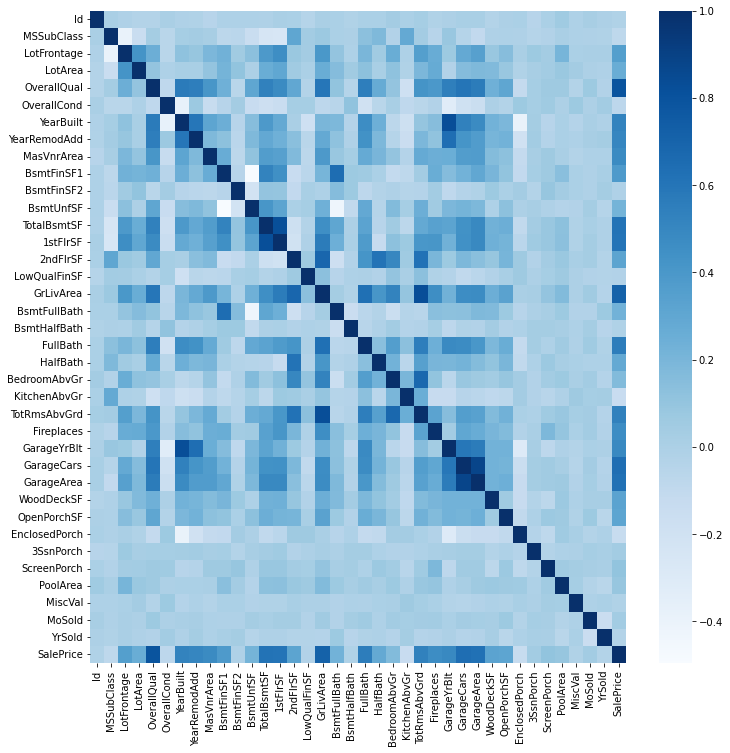

In [8]:
#Heat map to descripe the correlations between numerical varibles
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap = 'Blues')

In [9]:
df.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

## **SalesPrice와 유의미한 변수 추출**

In [10]:
imp_cols = list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.4) | (df.corr()['SalePrice']<-0.4)].index)
print(imp_cols)
print(len(imp_cols))
# LightGBM과의 차이
# 0.5가 아니라 0.45로 임계치 설정 값을 바꾼다면? 14개

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
14


In [11]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
# 카테고리형 변수

In [12]:
imp = imp_cols + cat_cols
print(imp)
print(len(imp))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']
21


In [13]:
df = df[imp]
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [14]:
df.isna().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
SalePrice         0
MSZoning          0
Utilities         0
BldgType          0
Heating           0
KitchenQual       0
SaleCondition     0
LandSlope         0
dtype: int64

In [15]:
df = df.fillna(df.mean())
# corr을 0.4로 했을 때

C:\Users\tongt\AppData\Local\TEMP/ipykernel_30652/3571354869.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [16]:
df.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

## **Features and prediciton split**

In [17]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [18]:
X

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [19]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## **get dummies**

In [20]:
X = pd.get_dummies(X, columns=cat_cols)
X

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,0,0,0,0,0,1,0,1,0,0


In [21]:
X

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,0,0,0,0,0,1,0,1,0,0


In [22]:
X.isna().sum().sum()

0

## **test data**

In [23]:
imp_test = imp
imp_test.remove('SalePrice')
print(imp_test)

df_test_new = test_data[imp_test]
df_test_new

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,NaN,0.0,0.0,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,1970.0,1.0,286.0,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,1960.0,2.0,576.0,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,NaN,0.0,0.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


In [24]:
X_test_new = pd.get_dummies(df_test_new, columns = cat_cols)
X_test_new


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,1961,0.0,882.0,896,896,1,5,0,...,1,0,0,0,0,1,0,1,0,0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,...,0,0,0,0,0,1,0,1,0,0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,...,1,0,0,0,0,1,0,1,0,0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,...,1,0,0,0,0,1,0,1,0,0
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,...,1,1,0,0,0,0,0,1,0,0
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,...,1,1,0,0,0,0,0,1,0,0
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,...,1,0,0,0,0,1,0,1,0,0


In [25]:
missing_cols = set(X.columns ) - set(X_test_new.columns )
missing_cols
for i in missing_cols:
    X_test_new[i] = 0
X_test_new

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Heating_OthW,Utilities_NoSeWa,Heating_Floor
0,5,1961,1961,0.0,882.0,896,896,1,5,0,...,0,0,1,0,1,0,0,0,0,0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,...,0,0,1,0,1,0,0,0,0,0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,...,0,0,1,0,1,0,0,0,0,0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,...,0,0,1,0,1,0,0,0,0,0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,...,0,0,1,0,1,0,0,0,0,0
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,...,0,0,0,0,1,0,0,0,0,0
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,...,0,0,0,0,1,0,0,0,0,0
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,...,0,0,1,0,1,0,0,0,0,0


In [26]:
missing_cols

{'Heating_Floor', 'Heating_OthW', 'Utilities_NoSeWa'}

In [27]:
X_test_new = X_test_new.fillna(0)
X_test_new.isna().sum()
X_test_new.shape

# TotalBsmtSF 1 총 지하실 면적의 제곱피트 -> 0 
# GarageCars 1 수용정도 -> 0
# GarageArea 1 면적 -> 0
# 다 0으로 값 대체해도 될듯


(1459, 44)

## **Standard Scaler**

In [28]:
imp_col1 = imp_cols
imp_col1.remove('SalePrice')
imp_col1

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [29]:
scaler = MinMaxScaler()
# minmaxscaler라면? 성능비교해보기
X[imp_col1] = scaler.fit_transform(X[imp_col1])
X

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.666667,0.949275,0.883333,0.122500,0.140098,0.119780,0.259231,0.666667,0.500000,0.000000,...,0,0,0,0,0,1,0,1,0,0
1,0.555556,0.753623,0.433333,0.000000,0.206547,0.212942,0.174830,0.666667,0.333333,0.333333,...,1,0,0,0,0,1,0,1,0,0
2,0.666667,0.934783,0.866667,0.101250,0.150573,0.134465,0.273549,0.666667,0.333333,0.333333,...,0,0,0,0,0,1,0,1,0,0
3,0.666667,0.311594,0.333333,0.000000,0.123732,0.143873,0.260550,0.333333,0.416667,0.333333,...,0,1,0,0,0,0,0,1,0,0
4,0.777778,0.927536,0.833333,0.218750,0.187398,0.186095,0.351168,0.666667,0.583333,0.333333,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.920290,0.833333,0.000000,0.155974,0.142038,0.247362,0.666667,0.416667,0.333333,...,1,0,0,0,0,1,0,1,0,0
1456,0.555556,0.768116,0.633333,0.074375,0.252373,0.399036,0.327619,0.666667,0.416667,0.666667,...,1,0,0,0,0,1,0,1,0,0
1457,0.666667,0.500000,0.933333,0.000000,0.188543,0.195961,0.377920,0.666667,0.583333,0.666667,...,0,0,0,0,0,1,0,1,0,0
1458,0.444444,0.565217,0.766667,0.000000,0.176432,0.170721,0.140166,0.333333,0.250000,0.000000,...,0,0,0,0,0,1,0,1,0,0


In [30]:
X_test_new[imp_col1] = scaler.transform(X_test_new[imp_col1])
# fit_transform의 training data에, transform 은 test_data에


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [32]:
X_train
X_train.shape

(1168, 44)

In [33]:
X_test
X_test.shape

(292, 44)

## **Modeling**

In [34]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5)).mean()
    return rmse
# cv는 기본 디폴트 값이 3-folds 교차검정
# https://thebook.io/007017/part02/ch05/05/01-03/
def evaluation(y, predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r_squared = r2_score(y,predictions)
    return mae,mse,rmse,r_squared

In [35]:
svr = SVR(C = 1000)
# SVR은 비선형 데이터(시계열 데이터)에 더 적합
# SVR은 Regression으로 분류보다 regression에 적합.
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)
# 32829
# 60590
# 81111

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 59507.2732889976
MSE: 7852987229.018319
RMSE: 88617.08203850045
R2 Score: -0.02381398351220576
------------------------------
RMSE Cross-Validation: 81111.93766046049


## **Submit the answer on the test data**

In [36]:
X_test_new.fillna(0,inplace=True)

In [37]:
predictions_test = svr.predict(X_test_new)
predictions_test

array([164986.00924171, 164987.00747039, 165010.85694834, ...,
       165002.35675709, 164991.23315895, 165019.87591922])

In [38]:
id_col_test = test_data['Id']

output_for_sub = pd.DataFrame(columns=["SalePrice"])

output_for_sub.insert(0,'Id',id_col_test)

output_for_sub

,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [39]:
output_for_sub['SalePrice'] = predictions_test

In [40]:
output_for_sub

,Id,SalePrice
0,1461,164986.009242
1,1462,164987.007470
2,1463,165010.856948
3,1464,165006.617704
4,1465,165002.941609
...,...,...
1454,2915,164991.233159
1455,2916,164976.421190
1456,2917,165002.356757
1457,2918,164991.233159


In [41]:
output_for_sub.to_csv('House pricing.csv')